**Mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Importing the required libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import glob
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

**Data extraction from google drive**

In [ ]:
train_dir ="/content/drive/MyDrive/newdata/train"
test_dir="/content/drive/MyDrive/data/test"

**Image Preprocess - Data Transformation**

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 validation_split=0.2,                          # validation split 20%.
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
def get_images(directory):
  count = 0
  for root_dir, cur_dir, files in os.walk(directory):
      count += len(files)
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

hazardous =get_images("/content/drive/MyDrive/newdata/train/hazardous")
general =get_images("/content/drive/MyDrive/newdata/train/general")
infectious =get_images("/content/drive/MyDrive/newdata/train/infectious")
radioactive =get_images("/content/drive/MyDrive/newdata/train/radioactive")
print("Class - General    :",general)
print("Class - Hazardous  :",hazardous)
print("Class - Infectious :",infectious)
print("Class - Radioactive:",radioactive)

4 Classes
928 Train images
20 Test images
Class - General    : 147
Class - Hazardous  : 518
Class - Infectious : 158
Class - Radioactive: 105


In [ ]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator = test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size)

Found 928 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'general': 0, 'hazardous': 1, 'infectious': 2, 'radioactive': 3}

**MODEL BUILDING**

In [ ]:
# Initialising the CNN
model = Sequential()

# Convolution
model.add(Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[img_width,img_height, 3]))

# Pooling
model.add(MaxPooling2D(pool_size=2, strides=2))

# Convolutional layer
model.add(Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flattening
model.add(Flatten())

# Full Connection
model.add(Dense(128, activation='relu'))

# Output Layer
# For mulitclassification
model.add(Dense(num_classes, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation ='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4

**Model Training**

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 928 images belonging to 4 classes.


In [ ]:
model.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
trained = model.fit(train_generator, 
                          epochs = 0,
                          shuffle = True,
                          validation_data=validation_generator)

Epoch 1/40
29/29 [==============================] - 189s 6s/step - loss: 1.2636 - accuracy: 0.5453 - val_loss: 1.2455 - val_accuracy: 0.5582
Epoch 2/40
29/29 [==============================] - 91s 3s/step - loss: 1.2361 - accuracy: 0.5582 - val_loss: 1.2271 - val_accuracy: 0.5582
Epoch 3/40
29/29 [==============================] - 91s 3s/step - loss: 1.2206 - accuracy: 0.5582 - val_loss: 1.2145 - val_accuracy: 0.5582
Epoch 4/40
29/29 [==============================] - 94s 3s/step - loss: 1.2102 - accuracy: 0.5582 - val_loss: 1.2062 - val_accuracy: 0.5582
Epoch 5/40
29/29 [==============================] - 94s 3s/step - loss: 1.2033 - accuracy: 0.5582 - val_loss: 1.2007 - val_accuracy: 0.5582
Epoch 6/40
29/29 [==============================] - 92s 3s/step - loss: 1.1989 - accuracy: 0.5582 - val_loss: 1.1972 - val_accuracy: 0.5582
Epoch 7/40
29/29 [==============================] - 92s 3s/step - loss: 1.1960 - accuracy: 0.5582 - val_loss: 1.1905 - val_accuracy: 0.5582
Epoch 8/40
29/29 [=

1/1 [==============================] - 0s 33ms/step
[[0. 1. 0. 0.]]
[0, 100, 0, 0]
hazardous


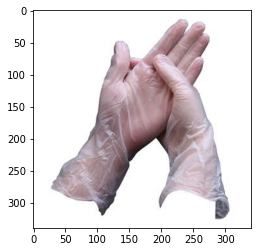

In [ ]:
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
    x = img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

def Predconvert(res):
  ans = list()
  for i in res:
    value = int(i*100)
    ans.append(value)
  return ans

Class = ["general","hazardous","infectious","radioactive"]
result = model.predict(prepare('/content/drive/MyDrive/data/test/infectious/medical 191.jpg'))
waste=load_img('/content/drive/MyDrive/data/test/infectious/medical 191.jpg')
plt.imshow(waste)
x = np.round(result).astype(int)
print(result)
final = Predconvert(result[0])
print(final)
max_value = max(final)
max_index = final.index(max_value)
print(Class[max_index])


1/1 [==============================] - 0s 25ms/step
[[0. 1. 0. 0.]]
[0, 100, 0, 0]
hazardous


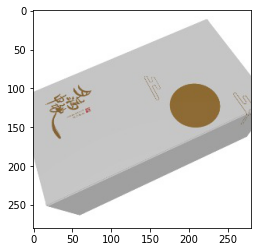

In [ ]:
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
    x = img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

def Predconvert(res):
  ans = list()
  for i in res:
    value = int(i*100)
    ans.append(value)
  return ans
  
Class = ["general","hazardous","infectious","radioactive"]
result = model.predict(prepare('/content/drive/MyDrive/data/train/general/cardboard 1055.jpeg'))
waste=load_img('/content/drive/MyDrive/data/train/general/cardboard 1055.jpeg')
plt.imshow(waste)
x = np.round(result).astype(int)
print(result)
final = Predconvert(result[0])
print(final)
max_value = max(final)
max_index = final.index(max_value)
print(Class[max_index])


1/1 [==============================] - 0s 29ms/step
[[0. 1. 0. 0.]]
[0, 100, 0, 0]
hazardous


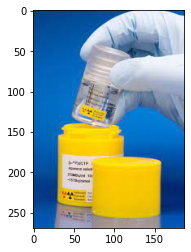

In [ ]:
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
    x = img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

def Predconvert(res):
  ans = list()
  for i in res:
    value = int(i*100)
    ans.append(value)
  return ans
  
Class = ["general","hazardous","infectious","radioactive"]
result = model.predict(prepare('/content/drive/MyDrive/data/test/radioactive/Copy of Copy of download (4).jpeg'))
waste=load_img('/content/drive/MyDrive/data/test/radioactive/Copy of Copy of download (4).jpeg')
plt.imshow(waste)
x = np.round(result).astype(int)
print(result)
final = Predconvert(result[0])
print(final)
max_value = max(final)
max_index = final.index(max_value)
print(Class[max_index])
